<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-71/blob/main/Reto_Entrega_1_Equipo_71.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ciencia y analítica de datos
## Semana 9 - Reto - Entrega 1
### Limpieza, análisis, visualización y kmeans

* Equipo:
1. Ignacio Antonio Quintero Chávez | A01794419
2. Francisco Xavier Bastidas Moreno | A01794188


* Profesora: María de la Paz Rico Fernández
* Fecha: 16 de Noviembre del 2022.

**Limpieza, análisis, visualización y agrupamiento.**



1.   Limpieza de base de datos.


2.  Explorar  cada datos (auxiliate de describe(), mean(), plot, boxplot de pandas):

3. Identificando tendencias centrales promedio, media y mediana de los datos. 

4. Identificar medidas de dispersión, máximo, mínimo .

5. Identificar medidas de posición no centrales , los cuartiles , outliers.  

6. Identificar correlaciones.

7. Preparar los datos 

8. Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.

9. Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.

In [1]:
# Se importan las librerías
import pandas as pd
import numpy as np
import statistics as sts
import seaborn as sns
import matplotlib.pyplot as plt
import os
import math
from io import BytesIO
from imblearn.metrics import geometric_mean_score, classification_report_imbalanced

from sklearn.model_selection import learning_curve, validation_curve
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import power_transform 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split #Para hacer las particiones
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score         
from sklearn.metrics import classification_report, make_scorer
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedKFold

In [2]:
# Se carga el dataset
dataset = "https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo-71/main/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv"
df = pd.read_csv(dataset, encoding='cp1252')
df.head(10)

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.022100,22.208870,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.200750,21.999580,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.288010,22.366850,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.294490,22.184350,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.244800,23.451380,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
5,DLBAJ108,POZO A.P. CNA 7 (ANTES POZO A.P. CNA 6),PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.220670,23.464930,2020,...,SI,NO,SI,SI,SI,SI,SI,SI,SI,SI
6,DLBAJ110,"POZO 26, SAN JUAN",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.213960,23.474600,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
7,DLBAJ111,VICTOR HUGO CESEÑA,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,CABO SAN LUCAS,POZO,-109.907306,22.890500,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
8,DLBAJ117,LAS PARRITAS,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,EL CARRIZAL,POZO,-110.088778,23.799861,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
9,DLBAJ118,SAN ANTONIO,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,LOS PLANES,POZO,-110.054722,23.824722,2020,...,NO,NO,SI,NO,SI,SI,SI,SI,NO,NO


In [3]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import geopandas as gpd
from shapely.geometry import Point

**Exploración de datos**

In [5]:
# Como parte de las buenas prácticas, generamos una copia para trabajar
df_copy = df.copy()

In [6]:
# Descripción del dataframe
df_copy.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L
count,1068.000000,1068.000000,1068.0,1064.000000,1062.000000,0.0
mean,-101.891007,23.163618,2020.0,235.633759,1138.953013,NaN
std,6.703263,3.887670,0.0,116.874291,1245.563674,NaN
min,-116.664250,14.561150,2020.0,26.640000,50.400000,NaN
25%,-105.388865,20.212055,2020.0,164.000000,501.750000,NaN
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,NaN
75%,-98.974716,25.510285,2020.0,292.710000,1322.750000,NaN
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,NaN


In [7]:
# Obtenemos la información del dataframe
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [8]:
# Obtenemos el nombre de las columnas
df_copy.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='

In [9]:
# Obtenemos la suma de valores perdidos por columnas
df_copy.isna().sum()

CLAVE                      0
SITIO                      0
ORGANISMO_DE_CUENCA        0
ESTADO                     0
MUNICIPIO                  0
ACUIFERO                   0
SUBTIPO                    0
LONGITUD                   0
LATITUD                    0
PERIODO                    0
ALC_mg/L                   4
CALIDAD_ALC                4
CONDUCT_mS/cm              6
CALIDAD_CONDUC             6
SDT_mg/L                1068
SDT_M_mg/L                 2
CALIDAD_SDT_ra             2
CALIDAD_SDT_salin          2
FLUORUROS_mg/L             0
CALIDAD_FLUO               0
DUR_mg/L                   1
CALIDAD_DUR                1
COLI_FEC_NMP/100_mL        0
CALIDAD_COLI_FEC           0
N_NO3_mg/L                 1
CALIDAD_N_NO3              1
AS_TOT_mg/L                0
CALIDAD_AS                 0
CD_TOT_mg/L                0
CALIDAD_CD                 0
CR_TOT_mg/L                0
CALIDAD_CR                 0
HG_TOT_mg/L                0
CALIDAD_HG                 0
PB_TOT_mg/L   

In [10]:
# Obtenemos las columnas que son numéricas
columnas_numericas = ['ALC_mg/L','CONDUCT_mS/cm','SDT_mg/L','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']

df_num = df_copy[['ALC_mg/L','CONDUCT_mS/cm','SDT_mg/L','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']]

df_num

,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
0,229.990,940.0,NaN,603.6,0.9766,213.732,<1.1,4.184656,0.0161,<0.003,<0.005,<0.0005,<0.005,<0.0015,0.0891
1,231.990,608.0,NaN,445.4,0.9298,185.0514,<1.1,5.75011,0.0134,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
2,204.920,532.0,NaN,342,1.8045,120.719,<1.1,1.449803,0.037,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
3,327.000,686.0,NaN,478.6,1.1229,199.879,<1.1,1.258597,0.0154,<0.003,0.005,<0.0005,<0.005,<0.0015,<0.025
4,309.885,1841.0,NaN,1179,0.2343,476.9872,291,15.672251,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,231.045,2350.0,NaN,1545.8,<0.2,752.096,<1.1,14.615488,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
1064,256.000,529.0,NaN,297,<0.2,273,<1.1,77.392,<0.01,<0.003,<0.005,<0.0005,<0.005,0.00709,0.07578
1065,330.690,2600.0,NaN,1873,0.7574,660.2126,620,36.477104,<0.01,<0.003,<0.005,<0.0005,<0.005,0.0242,0.2129
1066,193.140,873.0,NaN,690.6667,0.7108,406.368,<1.1,<0.02,<0.01,<0.003,<0.005,<0.0005,<0.005,0.012,0.1786


In [11]:
# Obtendremos los valores únicos de cada columna
columnas_numericas = ['ALC_mg/L','CONDUCT_mS/cm','SDT_mg/L','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']

for i in columnas_numericas:
    print("Nombre de la columna:" + i)
    print("Sumatoria por valores únicos:")
    print(df_num[i].value_counts())
    print("--------------")

Nombre de la columna:ALC_mg/L
Sumatoria por valores únicos:
157.620    5
193.815    4
195.360    4
204.765    4
257.850    4
          ..
341.000    1
151.000    1
106.000    1
99.000     1
256.000    1
Name: ALC_mg/L, Length: 816, dtype: int64
--------------
Nombre de la columna:CONDUCT_mS/cm
Sumatoria por valores únicos:
777.0    6
300.0    4
412.0    4
454.0    4
308.0    4
        ..
826.0    1
876.0    1
373.0    1
733.0    1
817.0    1
Name: CONDUCT_mS/cm, Length: 801, dtype: int64
--------------
Nombre de la columna:SDT_mg/L
Sumatoria por valores únicos:
Series([], Name: SDT_mg/L, dtype: int64)
--------------
Nombre de la columna:SDT_M_mg/L
Sumatoria por valores únicos:
496         4
320         4
292         4
317         4
380         4
           ..
148         1
224         1
392         1
1736        1
690.6667    1
Name: SDT_M_mg/L, Length: 925, dtype: int64
--------------
Nombre de la columna:FLUORUROS_mg/L
Sumatoria por valores únicos:
<0.2      162
0.466       3
0.5202 

<class 'pandas.core.frame.DataFrame'>


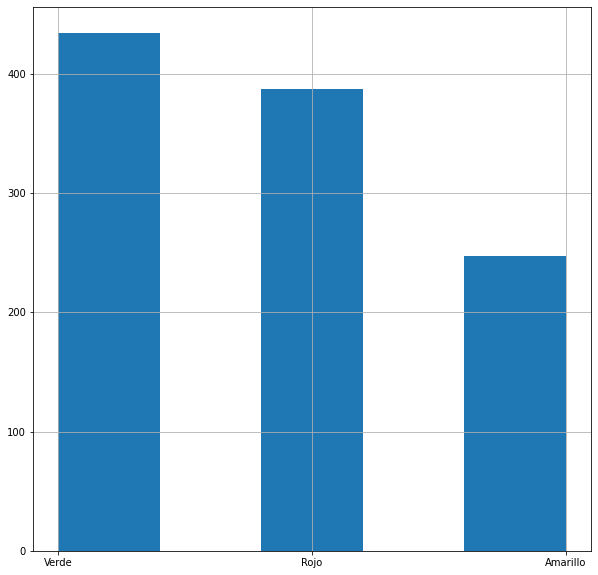

In [12]:
# Obtenemos un histograma de los valores de la columna Semáforo del dataset original
semaforo = pd.DataFrame(df['SEMAFORO'])
semaforo
print(type(semaforo))
semaforo['SEMAFORO'].hist(bins = 5, figsize=(10,10))

**Limpieza de base de datos.**

In [13]:
# Convertimos nuestros datos de tipo objeto hacia flotante, reemplazando los valores a mano
columnas_numericas = ['ALC_mg/L','CONDUCT_mS/cm','SDT_mg/L','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']

for name in columnas_numericas:
    df_num[name] = df_num[name].astype('str')
    df_num[name] = df_num[name].str.replace('<25','25') 
    df_num[name] = df_num[name].str.replace('<0.2','0.2') 
    df_num[name] = df_num[name].str.replace('<20','20') 
    df_num[name] = df_num[name].str.replace('<1.1','1.1')
    df_num[name] = df_num[name].str.replace('<0.02','0.02') 
    df_num[name] = df_num[name].str.replace('<0.01','0.01') 
    df_num[name] = df_num[name].str.replace('<0.003','0.003')
    df_num[name] = df_num[name].str.replace('<0.005','0.004') 
    df_num[name] = df_num[name].str.replace('<0.0005','0.0004') 
    df_num[name] = df_num[name].str.replace('<0.0015','0.0015') 
    df_num[name] = df_num[name].str.replace('<0.025','0.025')  
    df_num[name]= df_num[name].astype('float')

df_num.info()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1064 non-null   float64
 1   CONDUCT_mS/cm        1062 non-null   float64
 2   SDT_mg/L             0 non-null      float64
 3   SDT_M_mg/L           1066 non-null   float64
 4   FLUORUROS_mg/L       1068 non-null   float64
 5   DUR_mg/L             1067 non-null   float64
 6   COLI_FEC_NMP/100_mL  1068 non-null   float64
 7   N_NO3_mg/L           1067 non-null   float64
 8   AS_TOT_mg/L          1068 non-null   float64
 9   CD_TOT_mg/L          1068 non-null   float64
 10  CR_TOT_mg/L          1068 non-null   float64
 11  HG_TOT_mg/L          1068 non-null   float64
 12  PB_TOT_mg/L          1068 non-null   float64
 13  MN_TOT_mg/L          1068 non-null   float64
 14  FE_TOT_mg/L          1068 non-null   float64
dtypes: float64(15)
memory usage: 125.3 KB


In [14]:
# Se elimina la columna SDT_mg/L debido a que está vacía y no genera un problema
df_num.drop("SDT_mg/L", axis=1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
columnas_numericas_new= ['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L'] #

# Utilizamos la mediana para imputar los datos
for name in columnas_numericas_new:
  mediana = df_num[name].median() 
  df_num[name]= df_num[name].replace(np.nan, mediana)

# Obtenemos la información de nuestro dataframe nuevamente
df_num.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1068 non-null   float64
 1   CONDUCT_mS/cm        1068 non-null   float64
 2   SDT_M_mg/L           1068 non-null   float64
 3   FLUORUROS_mg/L       1068 non-null   float64
 4   DUR_mg/L             1068 non-null   float64
 5   COLI_FEC_NMP/100_mL  1068 non-null   float64
 6   N_NO3_mg/L           1068 non-null   float64
 7   AS_TOT_mg/L          1068 non-null   float64
 8   CD_TOT_mg/L          1068 non-null   float64
 9   CR_TOT_mg/L          1068 non-null   float64
 10  HG_TOT_mg/L          1068 non-null   float64
 11  PB_TOT_mg/L          1068 non-null   float64
 12  MN_TOT_mg/L          1068 non-null   float64
 13  FE_TOT_mg/L          1068 non-null   float64
dtypes: float64(14)
memory usage: 116.9 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [16]:
# Transpose index and columns and checking statistical data
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
ALC_mg/L,1068.0,235.558455,116.661485,26.6400,164.048750,215.527500,292.423750,1650.000000
CONDUCT_mS/cm,1068.0,1137.133052,1242.292889,50.4000,505.500000,815.000000,1321.250000,18577.000000
SDT_M_mg/L,1068.0,895.454185,2748.991295,25.0000,337.700000,550.400000,915.900000,82170.000000
FLUORUROS_mg/L,1068.0,1.075600,1.924278,0.2000,0.267175,0.503500,1.139850,34.803300
DUR_mg/L,1068.0,347.842003,359.514579,20.0000,121.274100,245.335800,453.930000,3810.692200
COLI_FEC_NMP/100_mL,1068.0,355.490356,2052.457014,1.1000,1.100000,1.100000,13.250000,24196.000000
N_NO3_mg/L,1068.0,4.317663,8.341504,0.0200,0.650932,2.080932,5.200047,121.007813
AS_TOT_mg/L,1068.0,0.019618,0.035209,0.0100,0.010000,0.010000,0.010000,0.452200
CD_TOT_mg/L,1068.0,0.003030,0.000894,0.0030,0.003000,0.003000,0.003000,0.032110
CR_TOT_mg/L,1068.0,0.012476,0.154435,0.0040,0.004000,0.004000,0.004000,5.003200


**Identificar correlaciones.**

In [17]:
df_num.corr()

,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
ALC_mg/L,1.000000,0.217212,0.079572,0.068860,0.243404,-0.016338,-0.000346,0.073458,0.032706,-0.014234,0.069779,0.016989,0.129942,0.043454
CONDUCT_mS/cm,0.217212,1.000000,0.286244,-0.025071,0.692656,0.018021,0.219881,-0.005047,0.029083,0.004436,0.057007,0.024816,0.095940,0.083172
SDT_M_mg/L,0.079572,0.286244,1.000000,-0.013709,0.347211,-0.001102,0.101522,-0.010092,0.010807,-0.000494,0.020332,0.002517,0.018963,0.020103
FLUORUROS_mg/L,0.068860,-0.025071,-0.013709,1.000000,-0.149549,0.003564,-0.019672,0.444079,-0.015123,-0.005205,-0.028597,-0.034191,-0.049742,-0.009994
DUR_mg/L,0.243404,0.692656,0.347211,-0.149549,1.000000,0.031772,0.301581,-0.106417,0.025010,0.007317,0.064998,-0.017304,0.083868,0.059789
COLI_FEC_NMP/100_mL,-0.016338,0.018021,-0.001102,0.003564,0.031772,1.000000,-0.000926,0.038151,-0.001656,-0.008938,-0.008903,0.021451,-0.005326,0.003045
N_NO3_mg/L,-0.000346,0.219881,0.101522,-0.019672,0.301581,-0.000926,1.000000,-0.007950,-0.009353,-0.015157,0.011367,-0.017317,-0.036810,0.013307
AS_TOT_mg/L,0.073458,-0.005047,-0.010092,0.444079,-0.106417,0.038151,-0.007950,1.000000,-0.009078,-0.009698,-0.012593,-0.023608,0.016916,0.014295
CD_TOT_mg/L,0.032706,0.029083,0.010807,-0.015123,0.025010,-0.001656,-0.009353,-0.009078,1.000000,-0.001824,-0.004631,-0.003080,-0.004205,-0.001036
CR_TOT_mg/L,-0.014234,0.004436,-0.000494,-0.005205,0.007317,-0.008938,-0.015157,-0.009698,-0.001824,1.000000,0.006998,-0.001149,-0.005112,0.000610


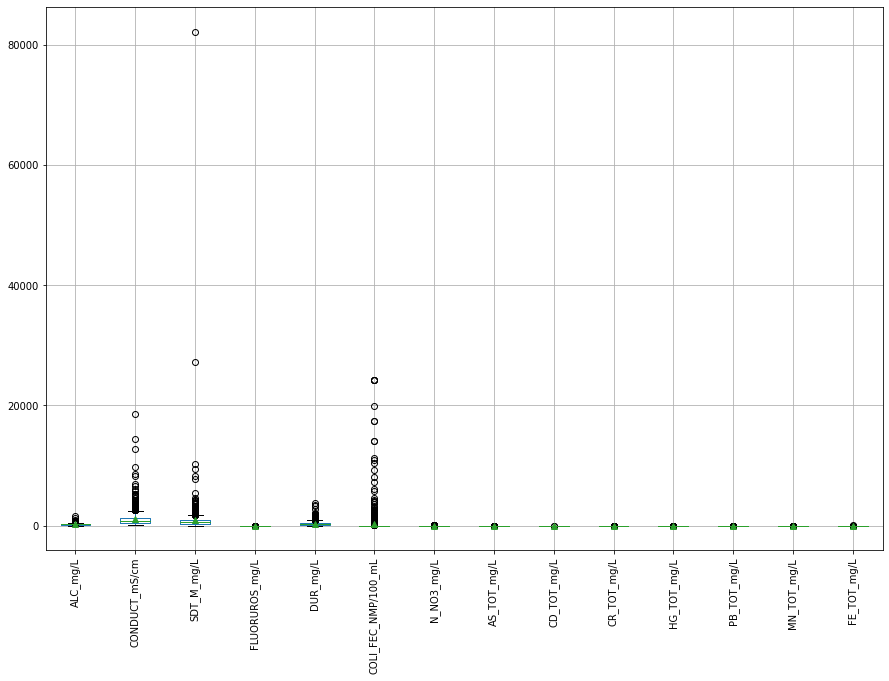

In [18]:
# Obtenemos un diagrama de caja y bigote para visualizar los outliers
outliers = df_num.boxplot(figsize = (15,10),showmeans = True)
outliers.plot()
plt.xticks(rotation=90)
plt.show()

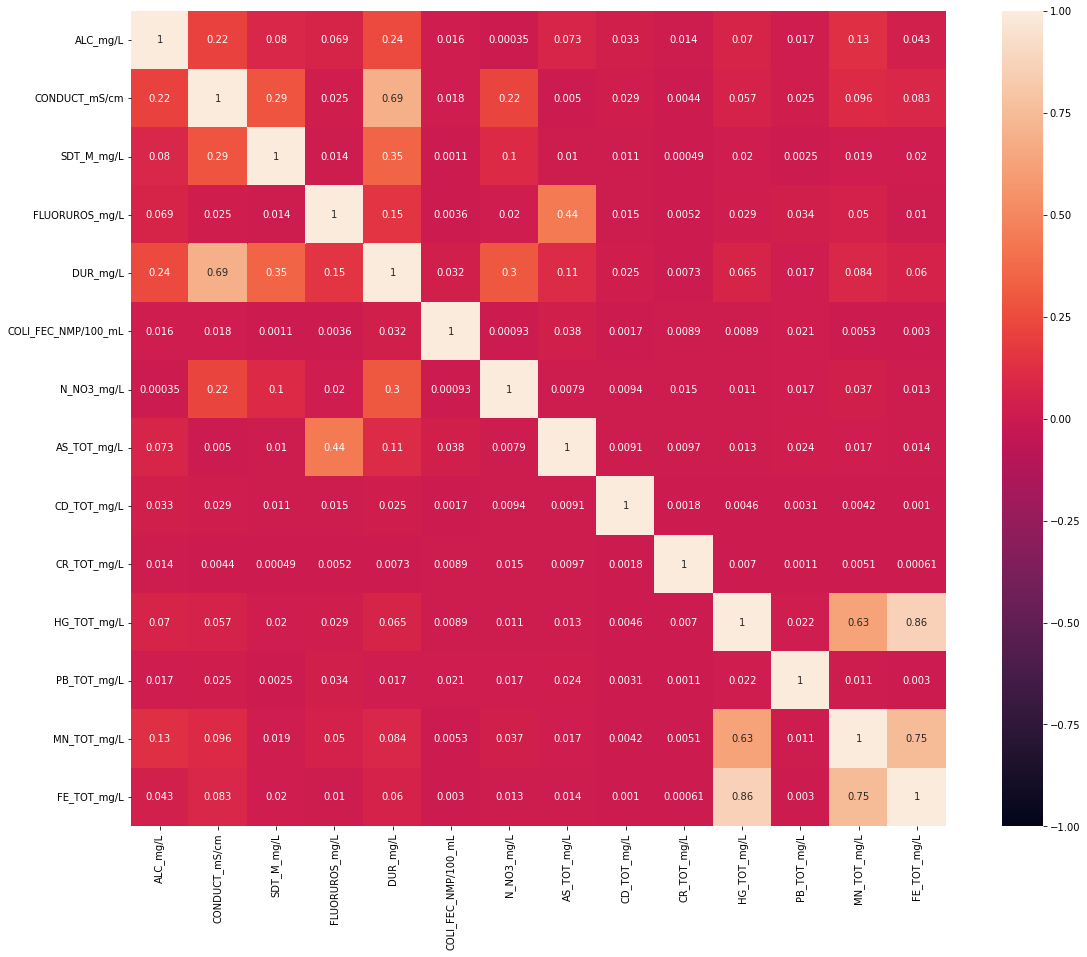

In [19]:
# Obtenemos una gráfica de la correlación
correlacion = df_num.corr().abs()
# Se define el área de trabajo
f, ax = plt.subplots(figsize = (20,15))
sns.heatmap(correlacion, vmax = 1, vmin = -1, square = True, annot = True)

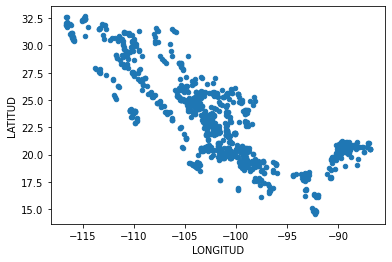

In [20]:
# Visualizamos las coordenadas de nuestro dataframe en un mapa
df_locations = df[['LONGITUD','LATITUD']]
df_locations
df_locations.plot.scatter('LONGITUD','LATITUD')

In [21]:
df_locations
df_locations["COORDENADAS"] = list(zip(df_locations.LONGITUD, df_locations.LATITUD))
df_locations["COORDENADAS"] = df_locations["COORDENADAS"].apply(Point)
df_locations.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,LONGITUD,LATITUD,COORDENADAS
0,-102.02210,22.20887,POINT (-102.0221 22.20887)
1,-102.20075,21.99958,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,POINT (-110.2448 23.45138)


,LONGITUD,LATITUD,COORDENADAS
0,-102.02210,22.20887,POINT (-102.02210 22.20887)
1,-102.20075,21.99958,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,POINT (-110.24480 23.45138)
...,...,...,...
1063,-99.54191,24.76036,POINT (-99.54191 24.76036)
1064,-99.70099,24.78280,POINT (-99.70099 24.78280)
1065,-99.82249,25.55197,POINT (-99.82249 25.55197)
1066,-100.32683,24.80118,POINT (-100.32683 24.80118)


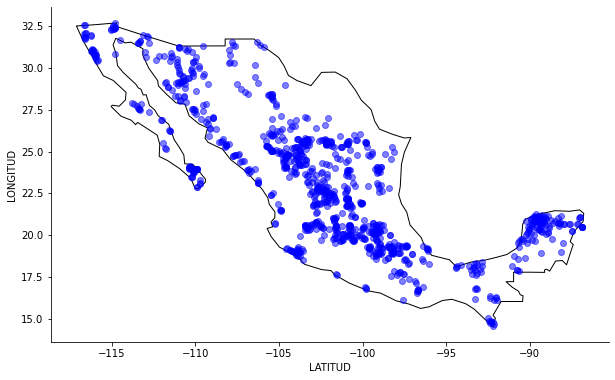

In [22]:
points_map = gpd.GeoDataFrame(df_locations, geometry="COORDENADAS")
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
world.name.unique()
fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')
gax.set_xlabel('LATITUD')
gax.set_ylabel('LONGITUD')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
points_map.plot(ax=gax, color='blue', alpha = 0.5)
points_map

**KMeans**

In [23]:
from sklearn.cluster import KMeans
# Clusters - 3
num_clusters = range(1,10) 
KM_clusters = [KMeans(n_clusters=i) for i in num_clusters]
Y_axis = df_locations[['LATITUD']]
X_axis = df_locations[['LONGITUD']]
result_kmeans = [KM_clusters[i].fit(Y_axis).score(Y_axis) for i in range(len(KM_clusters))]

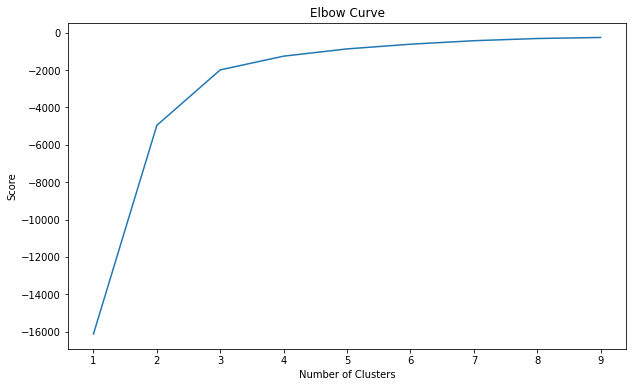

In [24]:
# Visualizing
plt.figure(figsize=(10,6))
plt.plot(num_clusters, result_kmeans)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [25]:
# Plotting 3 clusters
x = df[['LONGITUD', 'LATITUD']]
# Seleccionando 3 clusters
kmeans = KMeans(n_clusters=3).fit(x)
# Sacando los centroides
centroids = kmeans.cluster_centers_
labels = kmeans.predict(x)
C = kmeans.cluster_centers_

# Se convierte a dataframe
C_DF = pd.DataFrame(C)
C_DF["Coordinates"] = list(zip(C_DF[0], C_DF[1]))
# Convirtiendo los puntos para la gráfica
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point)
centroids_points = gpd.GeoDataFrame(C_DF, geometry="Coordinates")
centroids_points

,0,1,Coordinates
0,-101.722127,22.254226,POINT (-101.72213 22.25423)
1,-110.794488,28.438202,POINT (-110.79449 28.43820)
2,-90.728470,19.473362,POINT (-90.72847 19.47336)


In [26]:
# Se imprime el conteo de elementos por clusters
df['SEMAFORO'].value_counts()

Verde       434
Rojo        387
Amarillo    247
Name: SEMAFORO, dtype: int64

In [27]:
print(semaforo.head())
print(df_locations.head())

  SEMAFORO
0    Verde
1    Verde
2     Rojo
3    Verde
4     Rojo
    LONGITUD   LATITUD                  COORDENADAS
0 -102.02210  22.20887  POINT (-102.02210 22.20887)
1 -102.20075  21.99958  POINT (-102.20075 21.99958)
2 -102.28801  22.36685  POINT (-102.28801 22.36685)
3 -102.29449  22.18435  POINT (-102.29449 22.18435)
4 -110.24480  23.45138  POINT (-110.24480 23.45138)


In [28]:
semaforo['Semaforo'] = semaforo['SEMAFORO'].replace(to_replace = "Verde", value = "Green")
semaforo['Semaforo'].replace(to_replace = "Rojo", value = "Red", inplace=True)
semaforo['Semaforo'].replace(to_replace = "Amarillo", value = "Yellow", inplace=True)
semaforo

,SEMAFORO,Semaforo
0,Verde,Green
1,Verde,Green
2,Rojo,Red
3,Verde,Green
4,Rojo,Red
...,...,...
1063,Rojo,Red
1064,Rojo,Red
1065,Rojo,Red
1066,Verde,Green


In [35]:
df['CALIDAD_COLI_FEC'].value_counts()

Potable - Excelente        739
Buena calidad              208
Aceptable                   60
Contaminada                 49
Fuertemente contaminada     12
Name: CALIDAD_COLI_FEC, dtype: int64

**Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.**

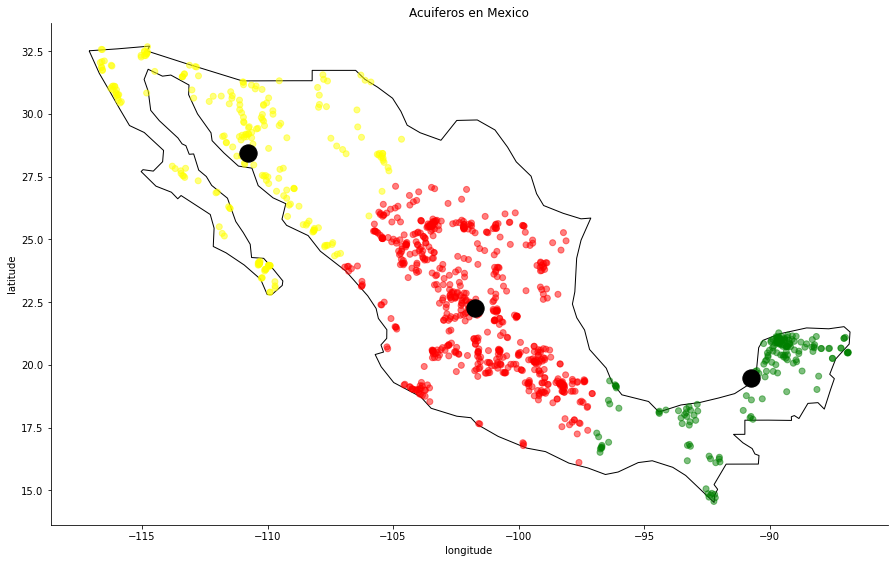

In [34]:
fig, gax = plt.subplots(figsize=(15,10))
colors = ['red','yellow','green']
color_asig = []

for row in labels:
  color_asig.append(colors[row])

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

points_map.plot(ax=gax, color=color_asig, alpha = 0.5) 
centroids_points.plot(ax=gax, color="black", alpha = 1, markersize = 300) 

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Acuiferos en Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()